# Reference

https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

# Imports

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Simple sample data

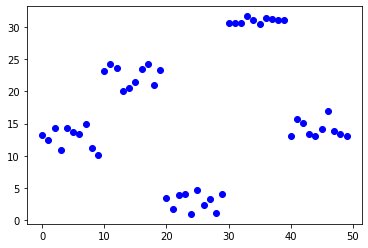

In [150]:
np.random.seed(18)

x = np.arange(0,50)
x = pd.DataFrame({'x':x})

# just random uniform distributions in differnt range

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

plt.plot(x, y, 'bo')

# Fit a single model

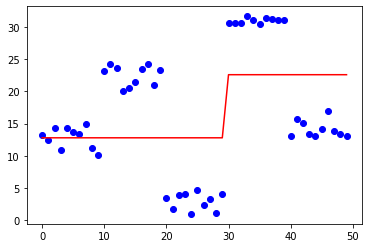

In [164]:
# Restrict the depth so that a single model does not fit well
model = tree.DecisionTreeRegressor(max_depth=1).fit(x, y)
y_pred = model.predict(x)

plt.plot(x, y, 'bo')
plt.plot(x, y_pred, 'r')

# Residuals of single model

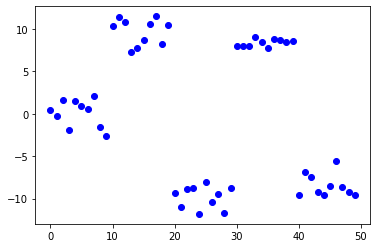

In [165]:
residuals = np.subtract(y.flatten(), y_pred)
plt.plot(x, residuals, 'bo')

# Gradient boosting with a second model fit to residuals

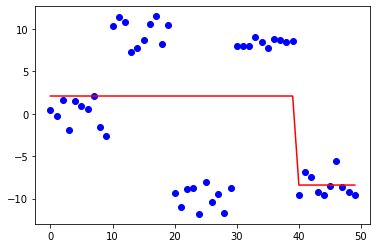

In [166]:
model_res1 = tree.DecisionTreeRegressor(max_depth=1).fit(x, residuals)
residuals_pred = model_res1.predict(x)

plt.plot(x, residuals, 'bo')
plt.plot(x, residuals_pred, 'r')

# Combine first model and residuals model

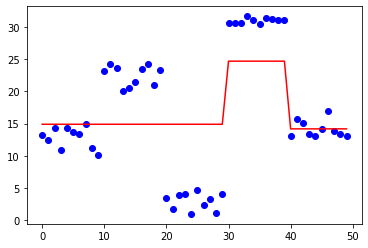

In [168]:
y_pred_adjusted = []
for pred, res in zip(y_pred, residuals_pred):
    y_pred_adjusted.append(pred + res)

plt.plot(x, y, 'bo')
plt.plot(x, y_pred_adjusted, 'r')

# Multiple sequential models

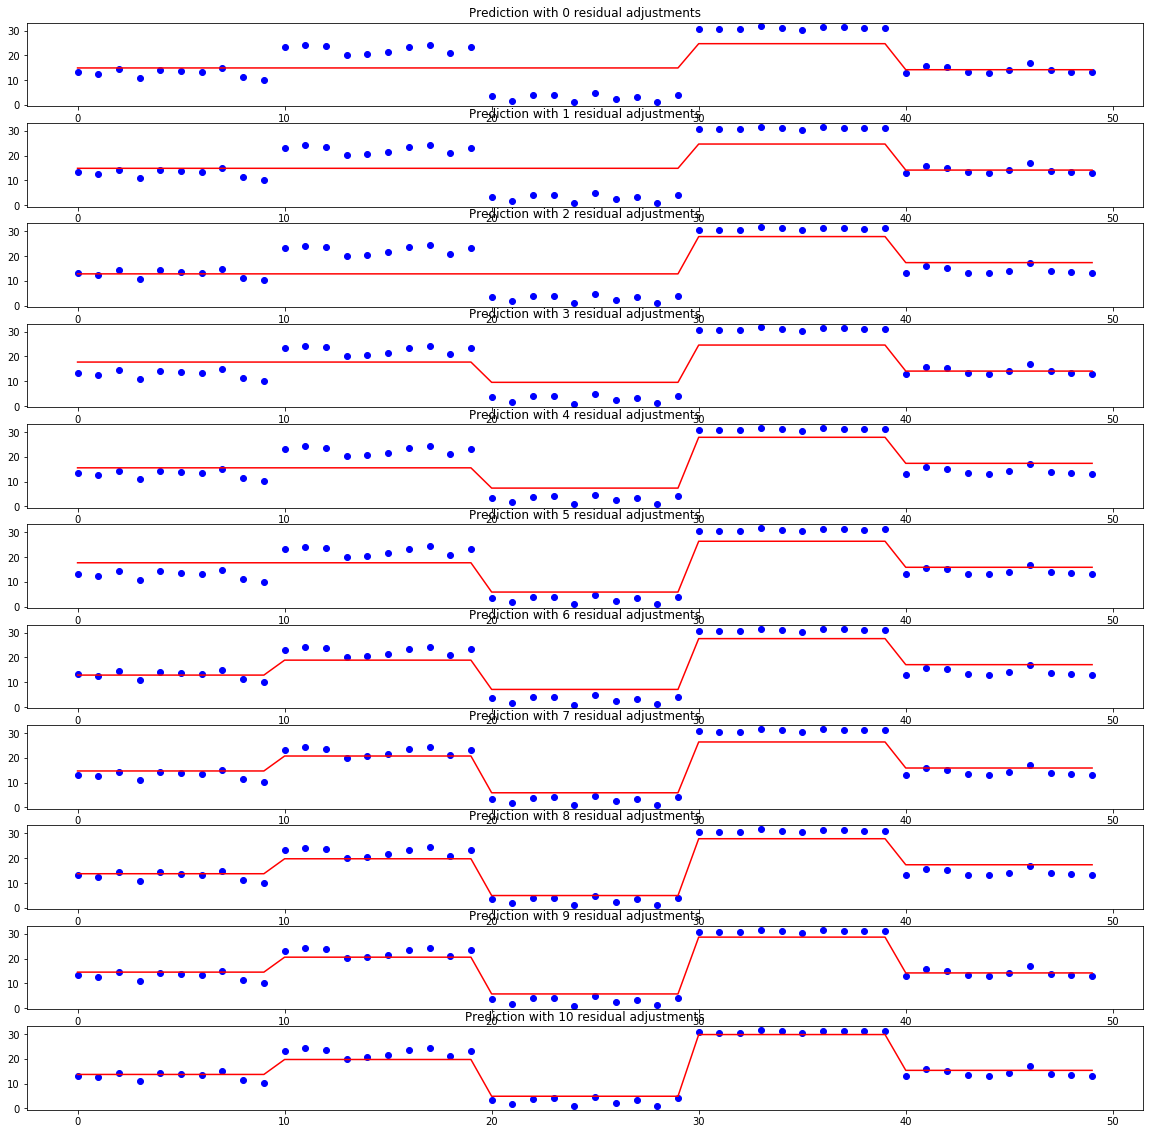

In [192]:
# fit first model on actual data
# make depth one to simulate a bad fit
model = tree.DecisionTreeRegressor(max_depth=1).fit(x, y)
y_pred = model.predict(x)

# number of sequenced models on residuals for gradient boosting
res_fits = 10

f = plt.figure(figsize=(20,20))

ax = f.add_subplot(res_fits + 1, 1, 1)
ax.set_title("Prediction with 0 residual adjustments")
ax.plot(x, y, 'bo')
ax.plot(x, y_pred_adjusted, 'r')

curr_y_pred = y_pred

for i in range(res_fits):
    # calculate residuals
    residuals = np.subtract(y.flatten(), curr_y_pred)
    
    # fit a model to residuals
    res_model = tree.DecisionTreeRegressor(max_depth=1).fit(x, residuals)
    
    # adjust predictions predictions
    curr_y_pred = np.add(curr_y_pred, res_model.predict(x))
    
    ax = f.add_subplot(res_fits + 1, 1, i + 2)
    ax.set_title("Prediction with {} residual adjustments".format(i + 1))
    ax.plot(x, y, 'bo')
    ax.plot(x, curr_y_pred.copy(), 'r')